In [9]:
import spacy
import pandas as pd

In [10]:
nlp = spacy.load('en_core_web_sm')

In [11]:
df = pd.read_csv('/kaggle/input/spam-classification/train.csv')

In [12]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
def lemmatization(text):
    doc = nlp(text)
    lemmalist = [token.lemma_ for token in doc]
    return ' '.join(lemmalist)

In [14]:
df['lemma'] = df['sms'].apply(lemmatization)

In [15]:
df.head()

,sms,label,lemma
0,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point , crazy .. available onl..."
1,Ok lar... Joking wif u oni...\n,0,ok lar ... joke wif u oni ... \n
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor ... u c already then sa...
4,"Nah I don't think he goes to usf, he lives aro...",0,"Nah I do not think he go to usf , he live arou..."


In [16]:
def remove_stopwords(text):
    doc = nlp(text)
    no_stopwords = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(no_stopwords)

In [18]:
df['preprocessed'] = df['lemma'].apply(remove_stopwords)

In [19]:
df.head()

,sms,label,lemma,preprocessed
0,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point , crazy .. available onl...",jurong point crazy available bugis n great wor...
1,Ok lar... Joking wif u oni...\n,0,ok lar ... joke wif u oni ... \n,ok lar joke wif u oni \n
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor ... u c already then sa...,u dun early hor u c \n
4,"Nah I don't think he goes to usf, he lives aro...",0,"Nah I do not think he go to usf , he live arou...",Nah think usf live \n


In [20]:
x = df['preprocessed']
y = df['label']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [22]:
X_train.shape, X_test.shape

((4459,), (1115,))

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
model = Pipeline([
    ('cvectorizer_tfidf', TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

model.fit(X_train, y_train)

Pipeline(steps=[('cvectorizer_tfidf', TfidfVectorizer()),
                ('Random Forest', RandomForestClassifier())])

In [25]:
model.score(X_test,y_test)*100

97.847533632287

In [26]:
pred = model.predict(X_test)

In [27]:
y_test[:5]

3690    0
3527    0
724     0
3370    0
468     0
Name: label, dtype: int64

In [28]:
pred[:5]

array([0, 0, 0, 0, 0])

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.99      0.86      0.92       161

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



<Axes: >

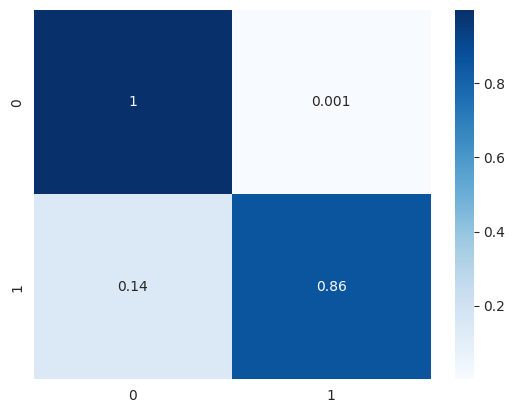

In [38]:
import seaborn as sns 
sns.set_style('darkgrid')

cf = confusion_matrix(y_test,pred,normalize = 'true')
sns.heatmap(cf,annot = True, cmap = 'Blues')